In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("Resultados_Tratados_ML_Barra.csv")

In [71]:
df.head()

,Unnamed: 0,Url,Preço,Titulo Imóvel,Endereço,Área,Número de Quartos
0,0,https://apartamento.mercadolivre.com.br/MLB-21...,1900000,Apartamento À Venda Em Rio De Janeiro - 46395,"Rua Henrique De Moura Costa, Barra Da Tijuca, ...",169,3
1,1,https://apartamento.mercadolivre.com.br/MLB-20...,1922800,Cobertura Península Green Garden - Barra Da Ti...,"Avenida Das Acácias Da Península, Barra Da Tij...",203,3
2,2,https://apartamento.mercadolivre.com.br/MLB-19...,4130000,"Apartamento Com 3 Dormitórios À Venda, 170 M² ...","Avenida Lúcio Costa, Barra Da Tijuca, Rio De J...",170,3
3,3,https://apartamento.mercadolivre.com.br/MLB-20...,1350000,"Apartamento Com 2 Dormitórios, 75 M² - Venda P...","Barra Da Tijuca, Rio De Janeiro Zona Oeste, Ri...",75,2
4,4,https://apartamento.mercadolivre.com.br/MLB-21...,3400000,"Apartamento Duplex Com 3 Dormitórios À Venda, ...","Avenida Lúcio Costa, Barra Da Tijuca, Rio De J...",304,3


In [72]:
q1, q3  = df["Preço"].quantile([.25,.75])

In [73]:
iqr = q3 - q1

In [74]:
upper_bound = q3+1.5*iqr

In [75]:
upper_bound

5875000.0

In [76]:
lower_bound = q1-1.5*iqr

<AxesSubplot:>

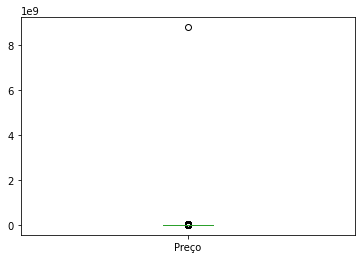

In [77]:
df["Preço"].plot(kind="box")

<AxesSubplot:>

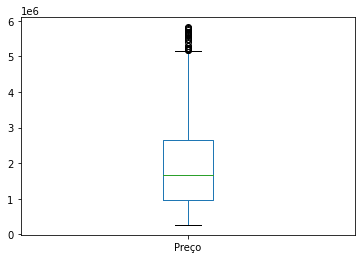

In [78]:
df.loc[df["Preço"].between(lower_bound, upper_bound), "Preço"].plot(kind="box")

In [68]:
def remover_outliers(tabela,coluna):
    q1 = tabela.loc[:,coluna].quantile(.25)
    q3 = tabela.loc[:,coluna].quantile(.75)
    
    iqr = q3-q1
    
    lb = max(q1 - 1.5*iqr,0) 
    ub = q3 + 1.5*iqr
    
    print(f"Lower bound: {lb}, upper bound: {ub}")
    
    len_before = sum(~tabela.loc[:,coluna].isnull()) #somando tudo que não eh vazio na coluna selecionada
    tabela.loc[[coluna] & (~tabela[coluna].between(lb,ub))] = np.nan
    len_after = sum(~tabela.loc[:,coluna].isnull())
    
    print (f"Removidos {(1 -(len_after/len_before))*100}% dos dados")
    return tabela

In [79]:
df = remover_outliers(df, "Preço") #removendo outliers de Preço

Lower bound: 0, upper bound: 5875000.0
Removidos 6.269925611052074% dos dados


In [80]:
df = remover_outliers(df, "Área") #removendo outliers de Área

Lower bound: 0, upper bound: 442.5
Removidos 2.607709750566889% dos dados


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

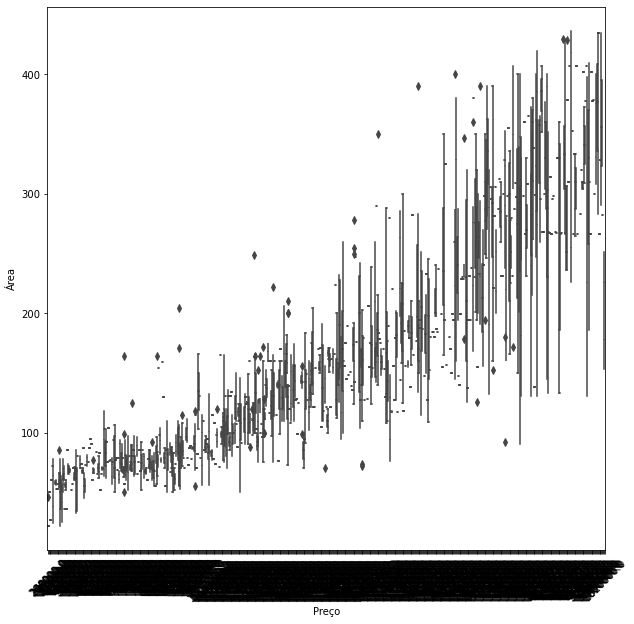

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Preço","Área"]], y="Área", x="Preço")
plt.xticks(rotation =45)

In [83]:
df["Número de Quartos"].value_counts(normalize=True)

4.0    0.320140
3.0    0.318393
2.0    0.267171
1.0    0.061118
5.0    0.025611
0.0    0.006985
6.0    0.000582
Name: Número de Quartos, dtype: float64

In [84]:
df.loc[df["Número de Quartos"]>5, "Número de Quartos"] = np.nan

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0')])

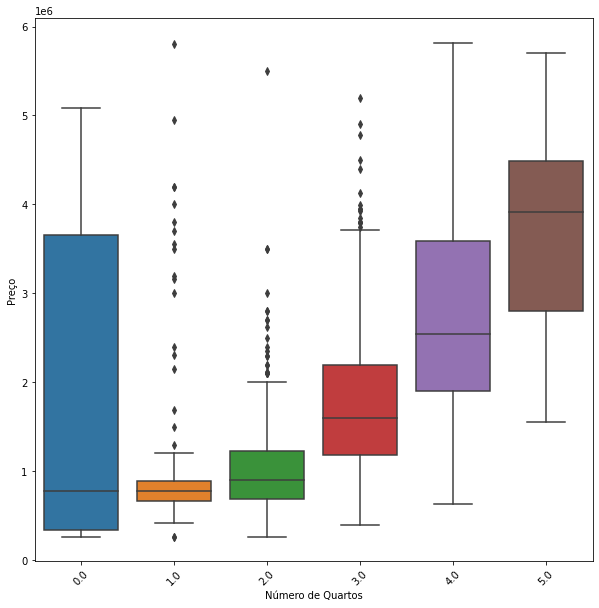

In [85]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Número de Quartos","Preço"]], y="Preço", x="Número de Quartos")
plt.xticks(rotation =45)

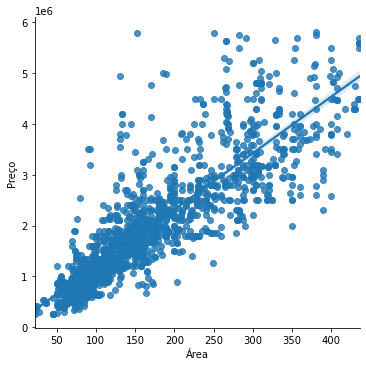

In [87]:
sns.lmplot(data=df, x="Área", y="Preço")

In [88]:
df.to_csv('Resultados_semOutliers_ML_Barra.csv') 